# 강화대교 조위
Arima도 충분히 좋은지 확인 (일자로 나오는 구간 없는지 확인)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/신입기수 프로젝트/Dataset')

### rawdata

In [ ]:
raw_data = pd.read_csv('rawdata.csv')
raw_data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터셋 
raw_data = raw_data[['날짜', '강화대교_조위']]
raw_data.날짜 = pd.to_datetime(raw_data.날짜)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Arima 처리한 데이터셋

In [ ]:
arima = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/강화대교 조위_처리완료.csv')
arima

,날짜,강화대교_조위
0,2012-05-01 00:00:00,445.0
1,2012-05-01 00:10:00,449.0
2,2012-05-01 00:20:00,451.0
3,2012-05-01 00:30:00,452.0
4,2012-05-01 00:40:00,450.0
...,...,...
276331,2022-07-18 23:10:00,510.0
276332,2022-07-18 23:20:00,492.0
276333,2022-07-18 23:30:00,475.0
276334,2022-07-18 23:40:00,458.0


In [ ]:
# 데이터셋 
arima.날짜 = pd.to_datetime(arima.날짜)

### 그래프 그릴 인덱스

In [ ]:
# 채워야 하는 인덱스
nan_index = list(raw_data[raw_data['강화대교_조위'].isnull()].index)
nan_index

[193,
 307,
 1359,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1432,
 1433,
 1434,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1441,
 1442,
 1443,
 1444,
 1445,
 1446,
 1447,
 1448,
 1449,
 1450,
 1451,
 1452,
 1453,
 1454,
 1455,
 1456,
 1457,
 1458,
 1459,
 1460,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 

In [ ]:
len(nan_index)

4927

In [ ]:
unconsecutive = []
consecutive = []

i = 0
while i < len(nan_index):
    if nan_index[i]+1 in nan_index: # 다음 거가 nanIndex 안에 있으면 다음 거까지 consecutive에 추가
        consecutive.extend([nan_index[i], nan_index[i+1]])
        try:
            i += 2
        except: #i가 len(nanIndex2) - 1
            break
    elif nan_index[i]-1 in nan_index: #다음 거는 nanIndex 안에 없지만 consecutive로 들어가야 하는 경우(반복 구간의 마지막 원소)
        consecutive.append(nan_index[i])
        i += 1
    else:
        unconsecutive.append(nan_index[i])
        i += 1

In [ ]:
# consecutive 내에서 구간별로 분리
dummy = []
consecutive2 = [] # 2차원 consecutive
for i in consecutive: 
    dummy.append(i)
    if i+1 not in consecutive:
        if i == consecutive[-2]: #만약 마지막 반복일 경우, consecutive[-1]을 추가로 넣어주어야 함
            dummy.append(i+1)
            consecutive2.append(dummy)
        else: 
            consecutive2.append(dummy)
            dummy= []   

In [ ]:
print(len(consecutive)+ len(unconsecutive) == len(nan_index))
print(len(sum(consecutive2, [])) == len(consecutive))

True
True


In [ ]:
len(consecutive2)

55

### 시각화

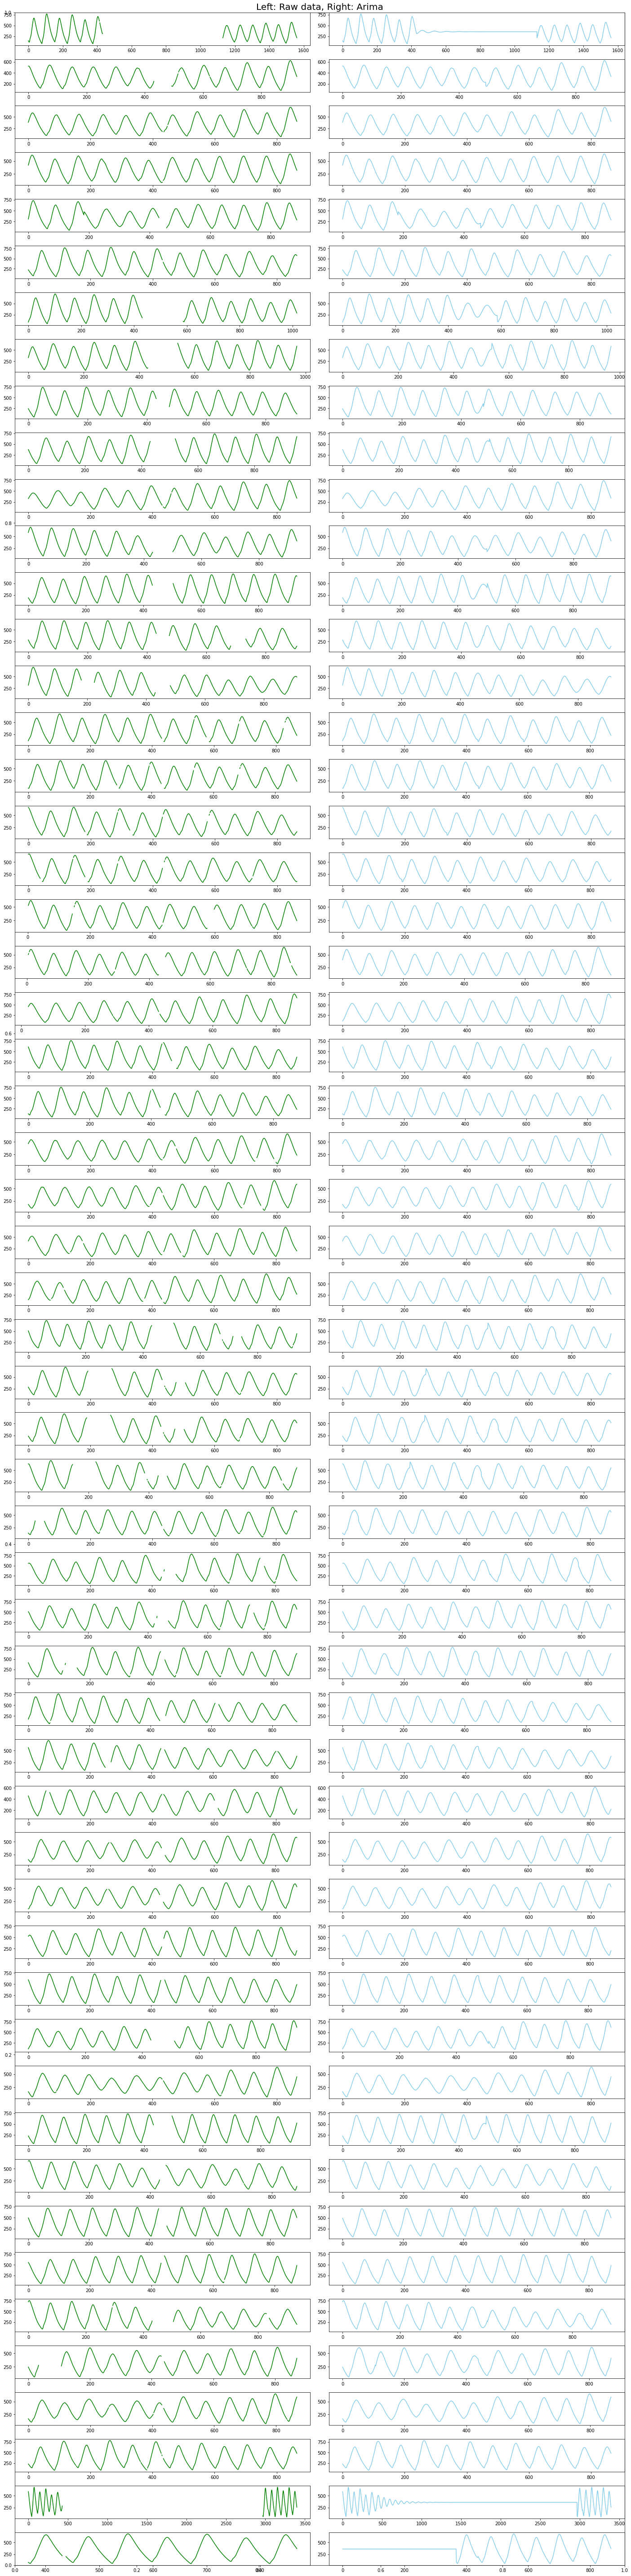

In [ ]:
# 왼: rawdata 분포, 오: Arima 처리
# (55, 2, n)
# f, axes = plt.subplots(len(consecutive2), 1)
# f.set_size_inches((20, 65))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

fig = plt.figure()
fig.set_size_inches((20, 80))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.title('Left: Raw data, Right: Arima', fontsize = 20)

n = 0
for i in range(1, len(consecutive2)*2+1, 2):
    start = consecutive2[n][0]-432
    end = consecutive2[n][-1]+432
    
    ax1 = fig.add_subplot(55, 2, i)
    x1 = range(len(raw_data['날짜'][start:end]))
    y1 = raw_data['강화대교_조위'][start:end]
    ax1.plot(x1, y1, color = 'green')

    ax2 = fig.add_subplot(55, 2, i+1)
    x2 = range(len(arima['날짜'][start:end]))
    y2 = arima['강화대교_조위'][start:end]
    ax2.plot(x2, y2, color = 'skyblue')
    n += 1

plt.tight_layout()
plt.show()